# Solving Characteristic equation of TE Modes

In [1]:
%matplotlib inline
import warnings
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import jv, kv, jn_zeros
from scipy.optimize import fsolve

## TE mode equation

풀어야 할 TE 모드 방정식을 함수 형태로 정리한다.
TE 모드는 그렇지 않지만 다른 general mode는 특성방정식에 여러 Bessel integer가 가능하므로  
일반화 하기 위해 클로저 형태로 함수를 정의했다.

In [2]:
def gen_eigen_eq_TE():
    
    def wrap(u):
        w = np.sqrt(v*v-u*u)
        return w * jv(1, u) / jv(0, u) + u * kv(1, w) / kv(0, w)

    return wrap

다음과 같이 TE eigen eq.를 LHS와 RHS로 나누어 정리해 두면 Graphical solution을 구하기 위해 그래프를 그리고 해를 분석하기 편리하다.

### LHS eq.

In [3]:
def lhs_eigen_eq_TE():
    
    def wrap(u):
        w = np.sqrt(v*v-u*u)
        return w * jv(1, u) / jv(0, u)

    return wrap

### RHS eq.

In [4]:
def rhs_eigen_eq_TE():
  
  def wrap(u):
    w = np.sqrt(v*v-u*u)
    return -u * kv(1, w) / kv(0, w)

  return wrap

## Solving Graphical Soulution of TE mode

### Getting assymtotic lines of LHS eq.

LHS 방정식에의 분모에는 베셀함수 `jv(0, u)`가 포함되어 있다.  
이 값이 0에 가까워지는 u값에서 LHS는 발산하며 점근선을 이룬다.  
이 점근선들은 Python 함수 `fsolve()`로 TE 모드 방정식의 수치해를 구할때 파라미터로 넣어주는 초기값 설정에 기준이 된다.

이들을 다음과 같이 `jn_zeros(l, num)` 함수를 사용해 구할 수 있다. 
이 함수는 `jv(l, u)` 함수가 0이 되는 num개의 u 값을 반환한다.

고려하는 num은 계산 하려는 시스템의 V 값에 의존하므로 다음과 같이 `num_of_zeros_jn(l)`를 정의해 사용할 수 있다.

In [5]:
def num_of_zeros_jn(l) -> int:
  count = 1
  while jn_zeros(l, count)[-1] < v:
    count += 1
    if count > 100:
      raise ValueError("Too many points of Bessel zeros")
  num = count - 1 
  return num


v = 10
num = num_of_zeros_jn(l=0) # TE mode의 경우 LHS 분모의 Bessel integer l=0 
print(jn_zeros(0, num))

[2.40482556 5.52007811 8.65372791]


### Graphical solution Analysis

ValueError: nt > 0

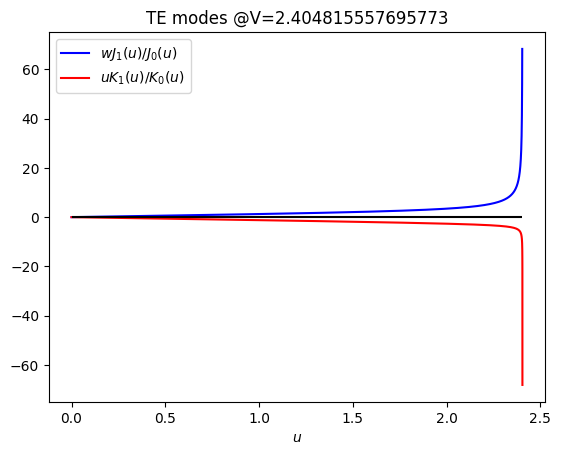

In [69]:
v = jn_zeros(0,1)[-1]-0.00001
na = 0.22

lhs = lhs_eigen_eq_TE()
rhs = rhs_eigen_eq_TE()

delta = 0.00001
u = np.linspace(delta, v-delta, int(v*5000))
lhs = lhs(u)
lhs_label = f"$w J_1(u)/J_0(u)$"

rhs = rhs(u)
rhs_label = f"$u K_1(u)/K_0(u)$"

# Limits plot range by setting values over 1.2V as 'None'
plot_limit = 70
mlhs = np.where(abs(lhs) >= plot_limit, None, lhs)
mrhs = np.where(abs(rhs) >= plot_limit, None, rhs)

fig, axe = plt.subplots()
axe.set_title(f"TE modes @V={v}")
axe.plot(u, mlhs, color='blue', label=lhs_label) # plot left-side of eigen-value eq.
axe.plot(u, mrhs, color='red', label=rhs_label)  # plot right-side of eigen-value eq.
axe.hlines(y=0, xmin=0, xmax=v, colors='k') # plot x axis.
axe.set_xlabel("$u$")
axe.legend()

# plot diverging assymtotic lines
num = num_of_zeros_jn(l=0)
aymtotic_vertical_lines = jn_zeros(0, num)
for n in aymtotic_vertical_lines:
  plt.vlines(x=n, ymin=-plot_limit, ymax=plot_limit, linestyles='dashed', colors='k', alpha=0.5, linewidth=0.9)

In [70]:
def get_init_points_to_solve_TE():
  offset1 = 0.001
  offset2 = 0.2
  num = num_of_zeros_jn(l=0)
  if v <= jn_zeros(0, 1):
    return None
  else:
    return jn_zeros(0, num) + offset1

init_points_for_TE = get_init_points_to_solve_TE()
print(init_points_for_TE)

None


In [71]:
def get_roots_for_TE():
  init_points_for_TE = get_init_points_to_solve_TE()
  if np.size(init_points_for_TE) < 2 and init_points_for_TE is None:
    return None
  
  with warnings.catch_warnings():
    warnings.simplefilter("error", RuntimeWarning)

    try:
      roots = fsolve(gen_eigen_eq_TE(), init_points_for_TE)
    except RuntimeWarning as e:
      print(f"RuntimeWarning: {e}")
      roots = fsolve(gen_eigen_eq_TE(), init_points_for[:-1])
      roots = np.append(roots, v)
      print("The last solution is replaced by the value V.")
    finally:
      return roots


roots_for_TE = get_roots_for_TE()
print(roots_for_TE)

None
